Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load and Inspect Dat

In [7]:
df = pd.read_csv('advertising.csv')  # Replace with your actual filename
df.drop(columns=['Unnamed: 0'], inplace=True)  # Remove index column
print(df.head())
print(df.info())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


Data Preprocessing

In [8]:
# Handle Missing Values

df.fillna(df.mean(numeric_only=True), inplace=True)
df.dropna(inplace=True)  # Drop rows with missing categorical values
print(df.isnull().sum())  # Should be all zeros


# Feature Scaling

scaler = StandardScaler()
scaled_features = ['TV', 'Radio', 'Newspaper']
df[scaled_features] = scaler.fit_transform(df[scaled_features])


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


 Feature Engineering

In [9]:
df['Total_Ad_Spend'] = df['TV'] + df['Radio'] + df['Newspaper']

Exploratory Data Analysis

<Axes: >

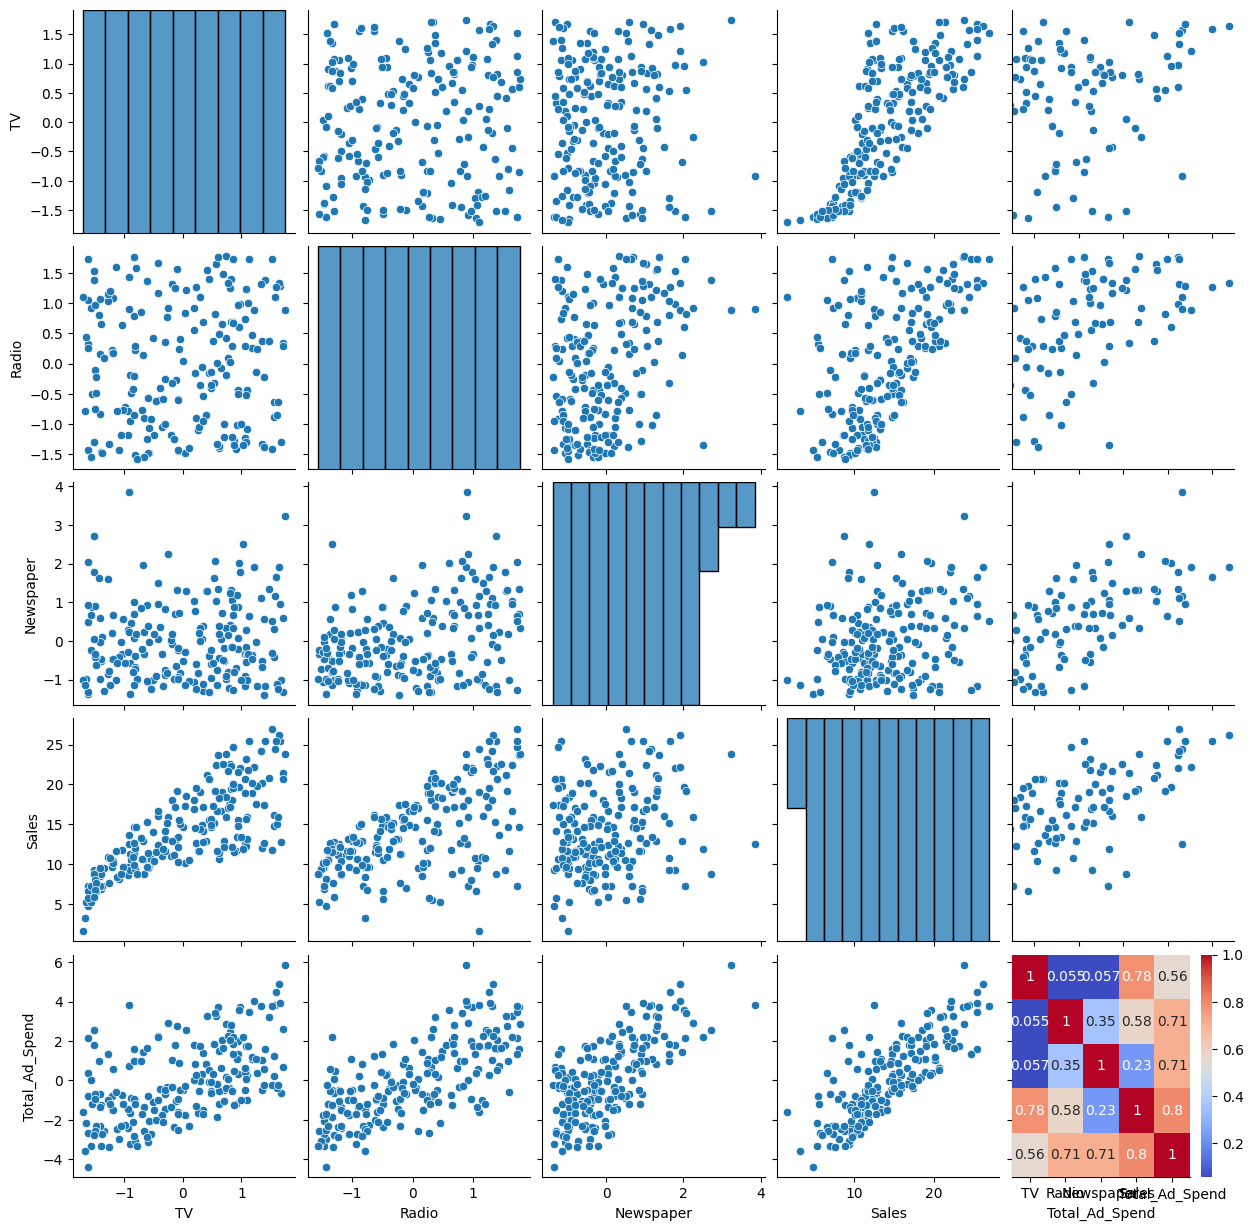

In [10]:
sns.pairplot(df)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Model Building 

In [11]:
# Train-test split
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Model Evaluation

Linear Regression MAE: 1.4607567168117603
Linear Regression RMSE: 1.7815996615334506
Linear Regression R² Score: 0.899438024100912


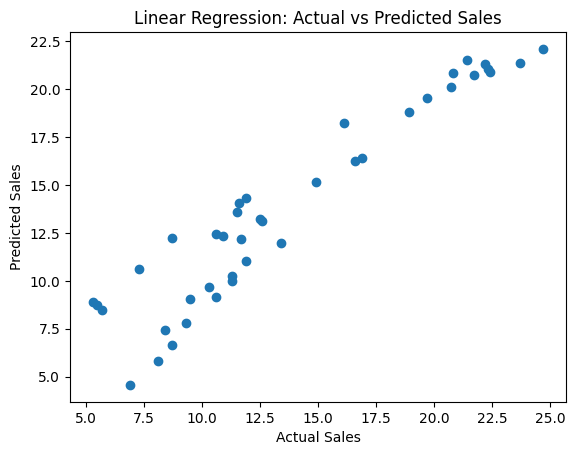

Random Forest MAE: 0.8369499999999996
Random Forest RMSE: 1.1092176747600082
Random Forest R² Score: 0.9610195258580149


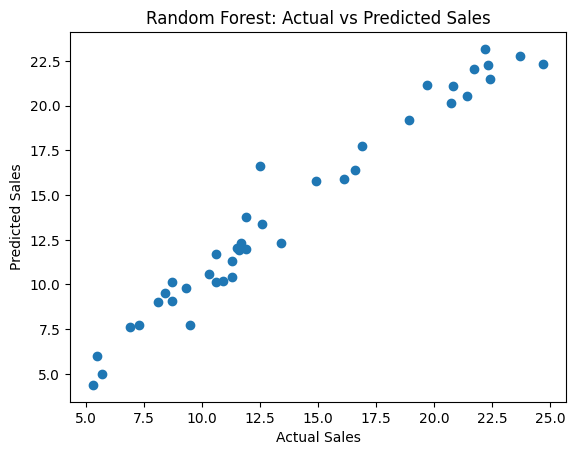

In [15]:
# Train-test split
X = df.drop('Sales', axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluation Function
def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"{name} MAE:", mean_absolute_error(y_test, y_pred))
    print(f"{name} RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print(f"{name} R² Score:", r2_score(y_test, y_pred))
    plt.scatter(y_test, y_pred)
    plt.title(f"{name}: Actual vs Predicted Sales")
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.show()

# ✅ Call the function here to get output
evaluate(lr, "Linear Regression")
evaluate(rf, "Random Forest")


Advertising Impact Analysis

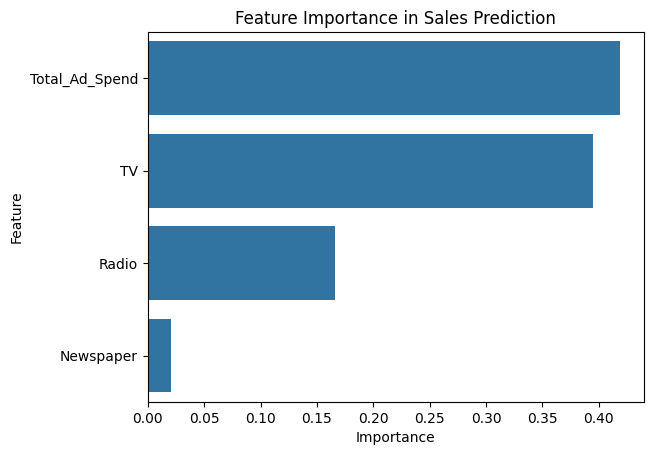

In [9]:
# Feature importance from Random Forest
importances = rf.feature_importances_
features = X.columns
imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
imp_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title("Feature Importance in Sales Prediction")
plt.show()

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# Load your dataset
df = pd.read_csv('advertising.csv')  # Make sure this file exists

# Drop index column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'sales_model.pkl')
# print("✅ Model saved as 'sales_model.pkl'")

['sales_model.pkl']

Stremlit dashboard:


2025-11-28 22:36:16.187 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 22:36:17.658 
  command:

    streamlit run C:\Users\shrav\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-11-28 22:36:17.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 22:36:17.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 22:36:17.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 22:36:17.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 22:36:17.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 22:36:17.670 Thre

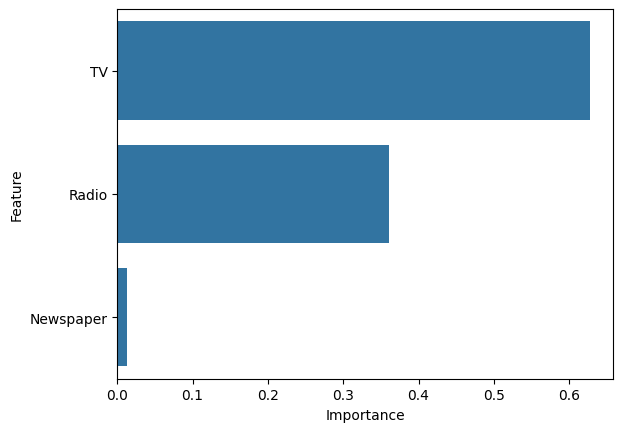

In [11]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Load models
rf_model = joblib.load('sales_model.pkl')  # Random Forest
lr_model = LinearRegression()  # Train separately if needed

# Title
st.title("📈 Sales Prediction Dashboard")

# Sidebar inputs
st.sidebar.header("Manual Input")
tv = st.sidebar.slider("TV Spend", 0.0, 300.0, 150.0)
radio = st.sidebar.slider("Radio Spend", 0.0, 100.0, 25.0)
newspaper = st.sidebar.slider("Newspaper Spend", 0.0, 100.0, 20.0)

# Predict manually
input_df = pd.DataFrame([[tv, radio, newspaper]], columns=['TV', 'Radio', 'Newspaper'])
rf_pred = rf_model.predict(input_df)[0]
st.subheader("🔮 Predicted Sales (Manual Input)")
st.metric(label="Random Forest Prediction", value=f"{rf_pred:.2f}")

# Upload CSV for batch prediction
st.subheader("📁 Batch Prediction")
uploaded_file = st.file_uploader("Upload CSV with columns: TV, Radio, Newspaper", type="csv")
if uploaded_file:
    batch_df = pd.read_csv(uploaded_file)
    batch_pred = rf_model.predict(batch_df)
    batch_df['Predicted_Sales'] = batch_pred
    st.write(batch_df)
    st.download_button("Download Predictions", batch_df.to_csv(index=False), "predictions.csv")

# Feature importance
st.subheader("📊 Feature Importance")
importances = rf_model.feature_importances_
features = ['TV', 'Radio', 'Newspaper']
imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
sns.barplot(x='Importance', y='Feature', data=imp_df)
st.pyplot(plt)

# Historical trends (if time-series column exists)
if uploaded_file:
    st.subheader("📈 Historical Trends")
    if 'Date' in batch_df.columns:
        batch_df['Date'] = pd.to_datetime(batch_df['Date'])
        st.line_chart(batch_df.set_index('Date')['Predicted_Sales'])


if uploaded_file:
    st.subheader("⚖️ Model Comparison")
    lr_model.fit(batch_df[['TV', 'Radio', 'Newspaper']], batch_df['Predicted_Sales'])
    lr_pred = lr_model.predict(batch_df[['TV', 'Radio', 'Newspaper']])
    comparison_df = pd.DataFrame({
        'Random Forest': batch_df['Predicted_Sales'],
        'Linear Regression': lr_pred
    })
    st.line_chart(comparison_df)



Local URL: http://localhost:8501
Network URL: http://10.254.23.243:8501